In [5]:
#Imports

from PIL import Image
import numpy as np
import math
import matplotlib.pyplot as plt



In [6]:
# 1.Add additive noise to the image


In [7]:
# Open the Original image

img = np.array(Image.open('jaguar.jpg')).astype(np.uint8)

# Apply gray scale
gray_img = (0.299 * img[:, :, 0] +0.587 * img[:, :, 1] +0.114 * img[:, :, 2]).astype(np.uint8) 


In [8]:
# Uniform noise

def Uniform(img, mean, std):

    noise_dist = np.random.uniform(mean, std, img.shape)        
    noise_matrix = noise_dist.reshape(img.shape)             # noise matrix in shape of the image 
    noisy_image = img + noise_matrix                         # image with added noise
    noisy_image = np.clip(noisy_image, 0, 255)               # limit the result values in range of 0(min) : 255(max)
    noisy_image = noisy_image.astype(np.uint8)
    return noisy_image

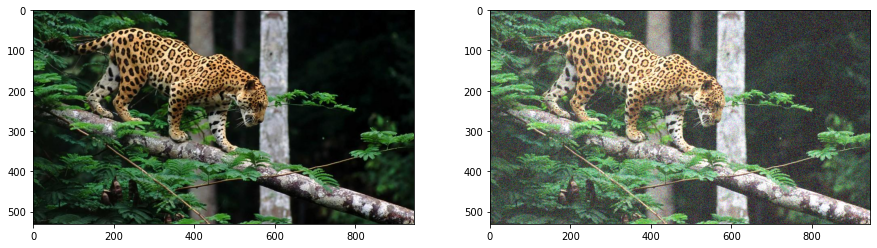

In [9]:
uniform_noise_BGR=Uniform(img,0,100)

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
fig.add_subplot(1, 2, 1)

plt.imshow(img)

# display the new image
fig.add_subplot(1, 2, 2)
plt.imshow(uniform_noise_BGR)


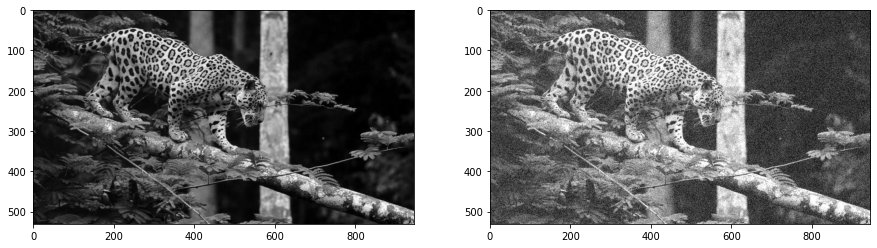

In [10]:
uniform_noise_Gray=Uniform(gray_img,0,100)

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
fig.add_subplot(1, 2, 1)

plt.imshow(gray_img,cmap='gray')

# display the new image
fig.add_subplot(1, 2, 2)

plt.imshow(uniform_noise_Gray, cmap='gray')

In [11]:
# Gaussian noise

In [12]:
def Gaussian(img, mean, std):
    
    noise_dist = np.random.normal(mean, std, img.shape)       # normal distribuation of the noisee
    noise_matrix = noise_dist.reshape(img.shape)              # noise matrix in shape of the image 
    noisy_image = img + noise_matrix                          # image with added noise
    noisy_image = np.clip(noisy_image, 0, 255)                # limit the result values in range of 0(min) : 255(max)
    noisy_image = noisy_image.astype(np.uint8)
    return noisy_image

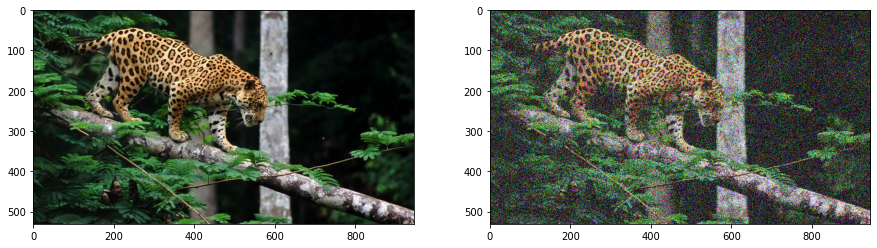

In [13]:
Gaussian_noise_BGR= Gaussian(img, 0, 100)

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
fig.add_subplot(1, 2, 1)

plt.imshow(img)

# display the new image
fig.add_subplot(1, 2, 2)

plt.imshow(Gaussian_noise_BGR, cmap='gray')

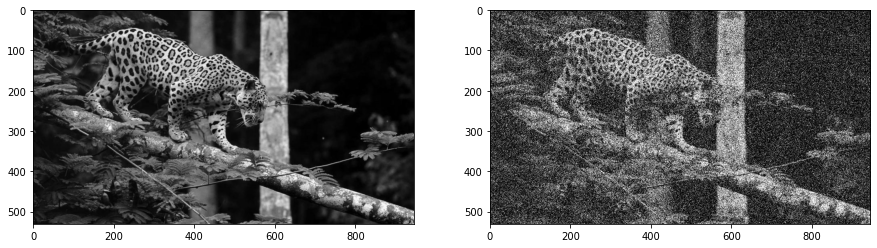

In [14]:
Gaussian_noise_Gray= Gaussian(gray_img, 0, 100)

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
fig.add_subplot(1, 2, 1)

plt.imshow(gray_img,cmap='gray')

# display the new image
fig.add_subplot(1, 2, 2)

plt.imshow(Gaussian_noise_Gray, cmap='gray')

In [15]:
# Salt& pepper

In [16]:
def Salt_Pepper(image,prob):

    SP_noisy = np.zeros(image.shape,np.uint8) 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            random_pixs = np.random.random()
            if random_pixs < prob:
                SP_noisy[i][j] = 0
            elif random_pixs> (1 - prob):
               SP_noisy[i][j] = 255
            else:
               SP_noisy[i][j] = image[i][j]
    return SP_noisy

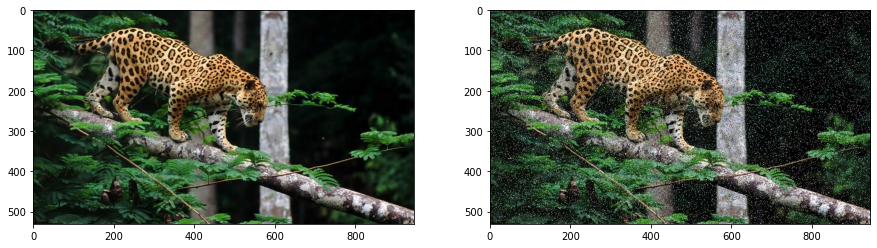

In [17]:
Salt_Pepper_noise_BGR=Salt_Pepper(img,0.05)

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
fig.add_subplot(1, 2, 1)

plt.imshow(img)

# display the new image
fig.add_subplot(1, 2, 2)

plt.imshow(Salt_Pepper_noise_BGR, cmap='gray')

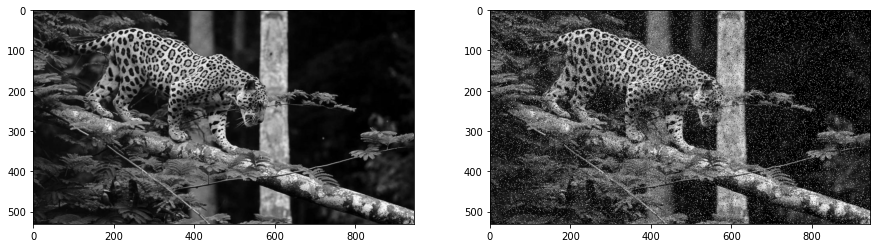

In [18]:
Salt_Pepper_noise_Gray=Salt_Pepper(gray_img,0.05)

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
fig.add_subplot(1, 2, 1)

plt.imshow(gray_img,cmap='gray')

# display the new image
fig.add_subplot(1, 2, 2)

plt.imshow(Salt_Pepper_noise_Gray, cmap='gray')

In [19]:
# 2. Filter the noisy image using the following low pass filters

In [20]:
def convolve(image,filter="Gaussian"):
    m, n = image.shape
    filtered_img=np.zeros((m,n))
    if filter=="Median":
        for i in range(m-2):  #rows
            for j in range(n-2):    #columns
                filtered_img[i:i+3,j:j+3]=image[i:i+3,j:j+3]
                window=image[i:i+3,j:j+3]
                list=window.flatten()
                median=np.sort(list)[4]
                filtered_img[i+1,j+1]=median
    #  padding is added in upcomming filters to generate the same size of input image
    else:           
        if filter=="Gaussian":
            kernel=(1/16)*np.array([[1,2,1],[2,4,2],[1,2,1]])

        elif filter=="Average":
            kernel=(1/9)*np.ones((3,3))

        for i in range(m-2):  #rows
            for j in range(n-2):    #columns
                filtered_img[i+2,j+2]=np.sum((image[i:i+3,j:j+3])*(kernel))
 
    return filtered_img 

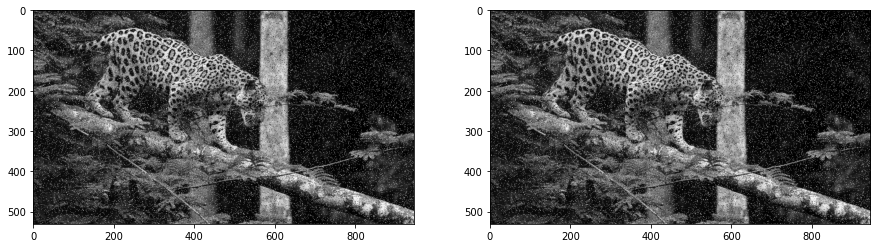

In [21]:
filtered_median=convolve(Salt_Pepper_noise_Gray,"Median")        #median best suited for salt and paper

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
fig.add_subplot(1, 2, 1)

plt.imshow(Salt_Pepper_noise_Gray,cmap='gray')

# display the new image
fig.add_subplot(1, 2, 2)

plt.imshow(filtered_median, cmap='gray')

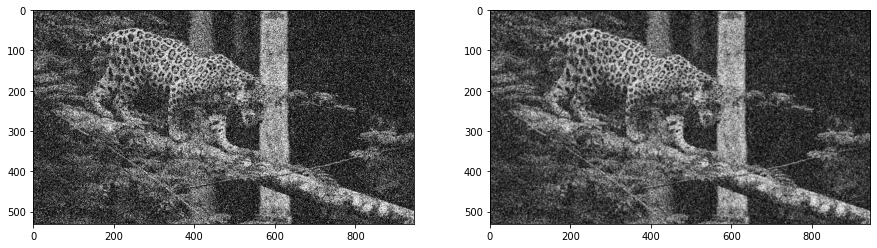

In [22]:
filtered_gaussian=convolve(Gaussian_noise_Gray,"Gaussian")  
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
fig.add_subplot(1, 2, 1)

plt.imshow(Gaussian_noise_Gray,cmap='gray')

# display the new image
fig.add_subplot(1, 2, 2)

plt.imshow(filtered_gaussian, cmap='gray')

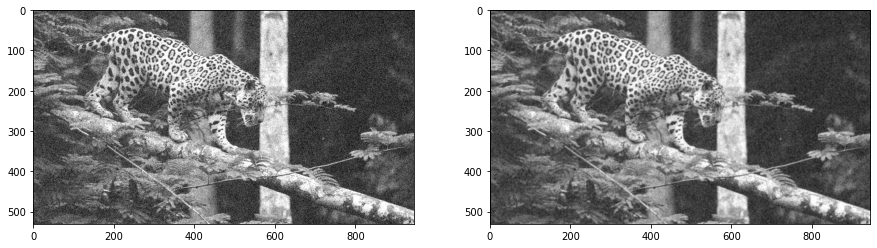

In [23]:
filtered_average=convolve(uniform_noise_Gray ,"Average")   

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
fig.add_subplot(1, 2, 1)

plt.imshow(uniform_noise_Gray,cmap='gray')

# display the new image
fig.add_subplot(1, 2, 2)

plt.imshow(filtered_average, cmap='gray')

In [24]:
# 3.Detect edges in the image using the following masks

In [25]:
def Prewitt(img):  
  
    # Prewitt Operator
    prewitt_x = [[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]
    prewitt_y = [[1, 1, 1], [0, 0, 0], [-1, -1, -1]]

   
    w,h = img.shape
    newgradientImage = np.zeros((w, h))

    #Applying gradient for each pixel in image 
    for row in range(w-len(prewitt_x)):
    
            for col in range(h-len(prewitt_x)):
                Gx = 0
                Gy = 0
                for i in range(len(prewitt_x)):
                    for j in range(len(prewitt_y)):
                        pixelVal = img[row+i, col+j] 
                        Gx += prewitt_x[i][j] * pixelVal 
                        Gy += prewitt_y[i][j] * pixelVal 

                newgradientImage[row+1,col+1]= int(math.sqrt(Gx*Gx + Gy*Gy))
    return newgradientImage

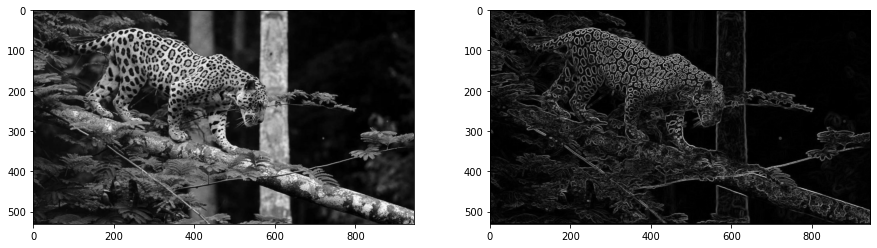

In [26]:
Prewitt_Gray= Prewitt(gray_img)

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
fig.add_subplot(1, 2, 1)

plt.imshow(gray_img,cmap='gray')

# display the new image
fig.add_subplot(1, 2, 2)

plt.imshow(Prewitt_Gray, cmap='gray')

In [27]:
def Roberts(img):

    roberts_x = [[1,0],[0,-1]]
    roberts_y = [[0,1],[-1,0]]
    w,h = img.shape
    newgradientImage = np.zeros((w, h))
    #Applying gradient for each pixel in image 
    for row in range(w-len(roberts_x)):
        for col in range(h-len(roberts_y)):
            Gx = 0
            Gy = 0
            for i in range(len(roberts_x)):
                for j in range(len(roberts_y)):
                    val = img[row+i, col+j] 
                    Gx += roberts_x[i][j] * val
                    Gy += roberts_y[i][j] * val
            newgradientImage[row+1,col+1] = int(math.sqrt(Gx*Gx + Gy*Gy))
    return newgradientImage

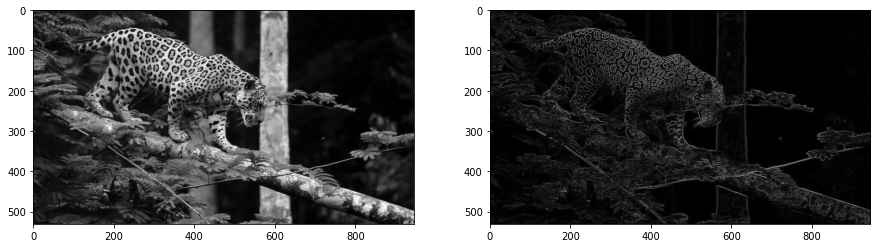

In [28]:
Roberts_Gray=Roberts(gray_img)

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
fig.add_subplot(1, 2, 1)

plt.imshow(gray_img,cmap='gray')

# display the new image
fig.add_subplot(1, 2, 2)

plt.imshow(Roberts_Gray, cmap='gray')


In [29]:
def sobel (image):


    # image shape
    H, V = image.shape   

    # Sobel filters
    vertical_grad_filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  # kernel Gx
    horizontal_grad_filter = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])  # kernel Gy

    #  initialization of the output image array(sobel x, sobel y , gradient) (all elements are 0)
    H_filtered_image= np.zeros((H,V))
    V_filtered_image  = np.zeros((H,V))
    G_filtered_image = np.zeros((H,V))


    # Scan the image in both x and y directions
    for i in range(H - 2):
        for j in range(V - 2):

            gx = np.sum(np.multiply(vertical_grad_filter, image[i:i + 3, j:j + 3]))  # x direction
            H_filtered_image[i + 1, j + 1] = abs(gx)
            gy = np.sum(np.multiply(horizontal_grad_filter, image[i:i + 3, j:j + 3]))  # y direction
            V_filtered_image[i + 1, j + 1]=abs(gy)
            G_filtered_image[i + 1, j + 1] = np.sqrt(gx ** 2 + gy ** 2) 

    return  H_filtered_image,V_filtered_image, G_filtered_image


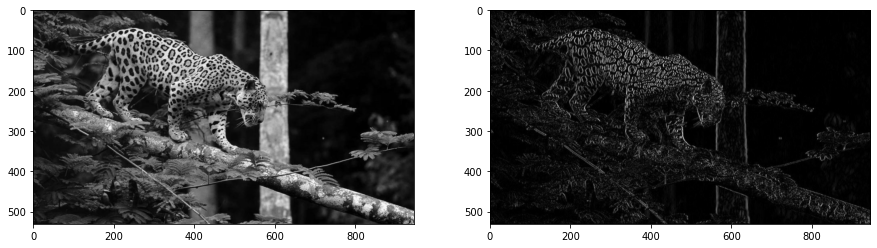

In [30]:
sobel_x,sobel_y,gradient=sobel(gray_img)

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
fig.add_subplot(1, 2, 1)

plt.imshow(gray_img,cmap='gray')

# display the new image
fig.add_subplot(1, 2, 2)

plt.imshow(sobel_x, cmap='gray')

# Gray image and sobel_x

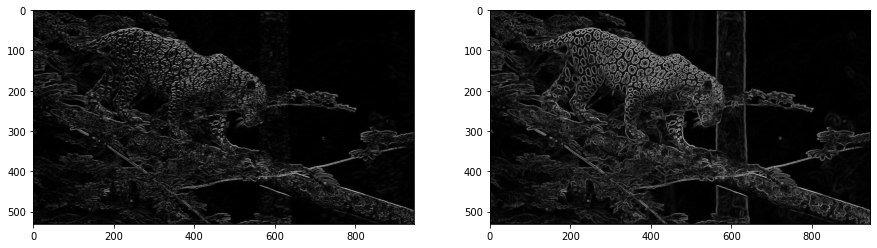

In [31]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
fig.add_subplot(1, 2, 1)

plt.imshow(sobel_y,cmap='gray')

# display the new image
fig.add_subplot(1, 2, 2)

plt.imshow(gradient, cmap='gray')

# sobel_y and gradient

In [32]:
def SobelFilter(image):
   
  #  initialization of the output image array(sobel x, sobel y , gradient) (all elements are 0)
    H_filtered_image= np.zeros(image.shape)
    V_filtered_image  = np.zeros(image.shape)
    G_filtered_image = np.zeros(image.shape)
    size=image.shape
 # Sobel filters
    vertical_grad_filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  # kernel Gx
    horizontal_grad_filter = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])  # kernel Gy
    for i in range(1, size[0] - 1):
        for j in range(1, size[1] - 1):
            H_filtered_image[i, j] = np.sum(np.multiply(image[i - 1 : i + 2, j - 1 : j + 2],   vertical_grad_filter))
            V_filtered_image[i, j] = np.sum(np.multiply(image[i - 1 : i + 2, j - 1 : j + 2],horizontal_grad_filter))
    
    G_filtered_image= np.sqrt(np.square(H_filtered_image) + np.square(V_filtered_image))
    G_filtered_image = np.multiply( G_filtered_image, 255.0 /  G_filtered_image.max())
   

    angles = np.rad2deg(np.arctan2(V_filtered_image, H_filtered_image))
    angles[angles < 0] += 180
    G_filtered_image = G_filtered_image.astype('uint8')
    return G_filtered_image, angles


def non_maximum_suppression(image, angles):

    size = image.shape
    suppressed = np.zeros(size)
    for i in range(1, size[0] - 1):
        for j in range(1, size[1] - 1):
            if (0 <= angles[i, j] < 22.5) or (157.5 <= angles[i, j] <= 180):
                value_to_compare = max(image[i, j - 1], image[i, j + 1])
            elif (22.5 <= angles[i, j] < 67.5):
                value_to_compare = max(image[i - 1, j - 1], image[i + 1, j + 1])
            elif (67.5 <= angles[i, j] < 112.5):
                value_to_compare = max(image[i - 1, j], image[i + 1, j])
            else:
                value_to_compare = max(image[i + 1, j - 1], image[i - 1, j + 1])
            
            if image[i, j] >= value_to_compare:
                suppressed[i, j] = image[i, j]
    suppressed = np.multiply(suppressed, 255.0 / suppressed.max())
    return suppressed

    
def double_threshold_hysteresis(image, low, high):
    weak = 50
    strong = 255
    size = image.shape
    result = np.zeros(size)
    weak_x, weak_y = np.where((image > low) & (image <= high))
    strong_x, strong_y = np.where(image >= high)
    result[strong_x, strong_y] = strong
    result[weak_x, weak_y] = weak
    dx = np.array((-1, -1, 0, 1, 1, 1, 0, -1))
    dy = np.array((0, 1, 1, 1, 0, -1, -1, -1))
    size = image.shape
    
    while len(strong_x):
        x = strong_x[0]
        y = strong_y[0]
        strong_x = np.delete(strong_x, 0)
        strong_y = np.delete(strong_y, 0)
        for direction in range(len(dx)):
            new_x = x + dx[direction]
            new_y = y + dy[direction]
            if((new_x >= 0 & new_x < size[0] & new_y >= 0 & new_y < size[1]) and (result[new_x, new_y]  == weak)):
                result[new_x, new_y] = strong
                np.append(strong_x, new_x)
                np.append(strong_y, new_y)
    result[result != strong] = 0
    return result


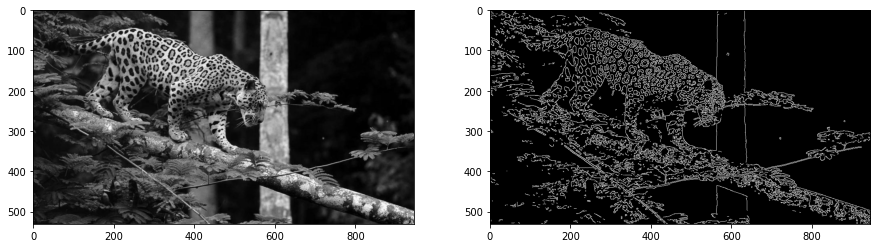

In [33]:
image, angles = SobelFilter(gray_img)
image = non_maximum_suppression(image, angles)
gradient = np.copy(image)
canny = double_threshold_hysteresis(image, 0, 50)

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
fig.add_subplot(1, 2, 1)

plt.imshow(gray_img,cmap='gray')

# display the new image
fig.add_subplot(1, 2, 2)

plt.imshow(canny, cmap='gray')

In [34]:
#4. Draw histogram and distribution curve

In [35]:
def get_histogram(image, bins):
    # array with size of bins, set to zeros
    histogram = np.zeros(bins)

    # loop through pixels and sum up counts of pixels
    for pixel in image:
        histogram[int(pixel)] += 1

    # return our final result
    return histogram

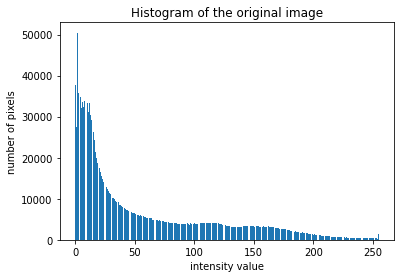

In [36]:
pixles = np.linspace(0, 255, 256)
freqs = get_histogram(img.flatten(), 256)  # hist_plot(img)

# plotting the histogram
plt.bar(pixles, freqs)
plt.xlabel('intensity value')
plt.ylabel('number of pixels')
plt.title('Histogram of the original image')
plt.show()

In [37]:
#5.Equalize the image.

In [38]:
def acumulativeSum(histogram):
    accumulativeList = []
    j = 0
    for i in range(0, len(histogram)):
        j += histogram[i]
        accumulativeList.append(j)
    return accumulativeList


def normalization(accArr):
    # Formula sum of sk = sum(nj/N)
    nj = (accArr-min(accArr))*255
    N = max(accArr) - min(accArr)
    # re-normalize the cumsum
    accArr = nj/N
    # cast it back to uint8 since we can't use floating point values in images
    accArr = accArr.astype('uint8')
    return accArr


def mappingNewImage(arr):
    # put array back into original shape since we flattened it
    img_new = np.reshape(arr, img.shape)
    return img_new


def equalize(flat):
    # execute our histogram function
    hist = get_histogram(flat, 256)
    # get the acumulative sum of histogram
    cs = acumulativeSum(hist)
    # normalize cs from 0 to 255
    normalizedCs = normalization(cs)
    # get the value from cumulative sum for every index in flat, and set that as img_new
    imgNew = mappingNewImage(normalizedCs[flat])
    return imgNew

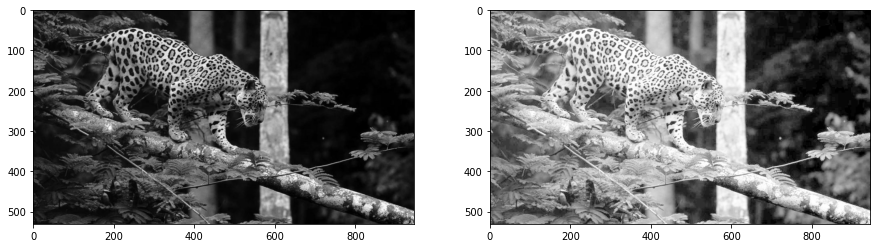

In [39]:
# convert our image into a numpy array
img = np.asarray(gray_img)
# put pixels in a 1D array by flattening out img array
flat = img.flatten()
imgNew = equalize(flat)

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
fig.add_subplot(1, 2, 1)

plt.imshow(gray_img,cmap='gray')

# display the new image
fig.add_subplot(1, 2, 2)

plt.imshow(imgNew, cmap='gray')

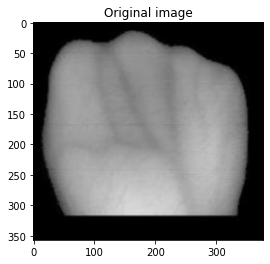

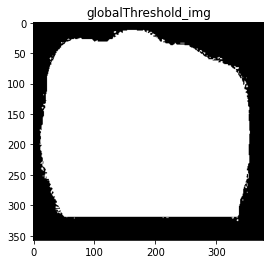

In [40]:
# 7. Local and Global thresholding
# Open the image
# Note : We Use another image for global thresholding from lesture slides 
img = np.array(Image.open('hand.jpeg')).astype(np.uint8)

# Apply gray scale
gray_img = np.round(0.299 * img[:, :, 0] +
                    0.587 * img[:, :, 1] +
                   0.114 * img[:, :, 2]).astype(np.uint8)

def histogram(image):
  h,w=image.shape
  grayscale_array = []
  for px in range(0,h):
    for py in range(0,w):
      intensity = image[px][py] 
      grayscale_array.append(intensity)

  total_pixels = w*h
  bins = range(0,257)
  img_histogram = np.histogram(grayscale_array, bins)
  return img_histogram


# 1. Basic global thresholding  
def Global_thresholding(image,threshold):
   h,w = np.shape(image)
   # pixel threshold 
   intensity_array = []
   for px in range(0,h):
    for py in range(0,w):
      intensity = image[px][py] 
      if (intensity <= threshold):
        intensity = 0
      else:
        intensity = 255
      image[px][py]=intensity
    
   return image 

#Global thresholding
plt.title('Original image')
plt.imshow(img) 
plt.show() 
threshold=4
globalThreshold_img=Global_thresholding(gray_img,threshold)
plt.title('globalThreshold_img')
plt.imshow(globalThreshold_img)
plt.set_cmap('gray') 
plt.show() 
plt.imsave('global_threshold.png', globalThreshold_img, cmap='gray', format='png')





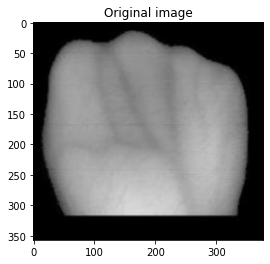

threshold is: 78


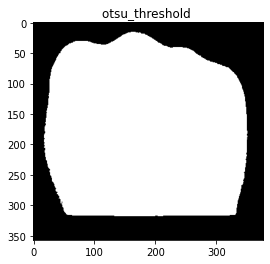

In [41]:
#2. Otsu global thresholding
img = np.array(Image.open('hand.jpeg')).astype(np.uint8)

# Apply gray scale
gray_img = np.round(0.299 * img[:, :, 0] +
                    0.587 * img[:, :, 1] +
                   0.114 * img[:, :, 2]).astype(np.uint8)

def histogram(image):
  h,w=image.shape
  grayscale_array = []
  for px in range(0,h):
    for py in range(0,w):
      intensity = image[px][py] 
      grayscale_array.append(intensity)

  total_pixels = w*h
  bins = range(0,257)
  img_histogram = np.histogram(grayscale_array, bins)
  return img_histogram


def otsu(image):
  h,w=image.shape
  # get pixels values probabilities using histogram 
  hist = histogram(image)
  # get the total number of pixels 
  total_pixels = w*h
  current_max, threshold = 0, 0
  sumT, sumF, sumB = 0, 0, 0
  for i in range(0,256):
    # getting the sum of probabilities of all pixels values 
    sumT += i * hist[0][i]
  weightB, weightF = 0, 0
  varBetween, meanB, meanF = 0, 0, 0

  #Iterating on all pixels' values to get the best threshold 
  for i in range(0,256):
    weightB += hist[0][i]
    weightF = total_pixels - weightB
    #Check if the pixels values represented in one value 
    if weightF == 0:
      break
    sumB += i*hist[0][i]
    sumF = sumT - sumB
    meanB = sumB/weightB
    meanF = sumF/weightF
    varBetween = weightB * weightF
    varBetween *= (meanB-meanF)*(meanB-meanF)
    if varBetween > current_max:
      current_max = varBetween
      threshold = i 
  print ("threshold is:", threshold)
  otsu_image=Global_thresholding(image,threshold) 
  return otsu_image


plt.title('Original image')
plt.imshow(img) 
plt.show() 
otsu_threshold=otsu(gray_img)
plt.title('otsu_threshold ')
plt.imshow(otsu_threshold)
plt.set_cmap('gray') 
plt.show() 
plt.imsave('otsu_threshold.png', otsu_threshold, cmap='gray', format='png')


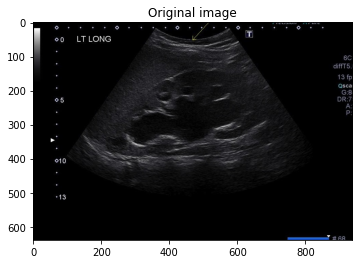

threshold is: 49


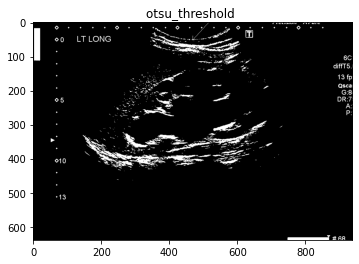

In [42]:
# Another otsu Example 

img = np.array(Image.open('kidney.jpg')).astype(np.uint8)

# Apply gray scale
gray_img = np.round(0.299 * img[:, :, 0] +
                    0.587 * img[:, :, 1] +
                   0.114 * img[:, :, 2]).astype(np.uint8) 

plt.title('Original image')
plt.imshow(img) 
plt.show() 
otsu_threshold=otsu(gray_img)
plt.title('otsu_threshold ')
plt.imshow(otsu_threshold)
plt.set_cmap('gray') 
plt.show() 
plt.imsave('kidney_otsu_threshold.png', otsu_threshold, cmap='gray', format='png')

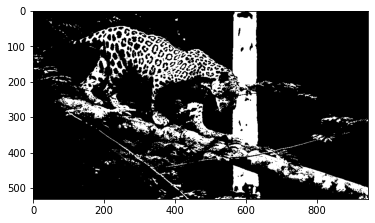

In [43]:
#Other Example for global and local thresholding
img = np.array(Image.open('jaguar.jpg')).astype(np.uint8)

# Apply gray scale
gray_img = np.round(0.299 * img[:, :, 0] +
                    0.587 * img[:, :, 1] +
                   0.114 * img[:, :, 2]).astype(np.uint8) 


#Global thresholding
threshold=127
globalThreshold_img=Global_thresholding(gray_img,threshold)
plt.imshow(globalThreshold_img)
plt.set_cmap('gray') 
plt.show() 
plt.imsave('global_threshold.png', globalThreshold_img, cmap='gray', format='png')

threshold is: 82


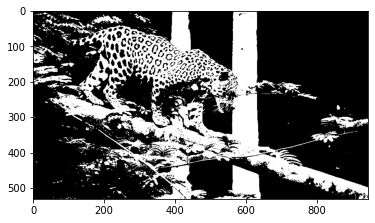

In [44]:
#Other Example = Otsu thresholding
img = np.array(Image.open('jaguar.jpg')).astype(np.uint8)

# Apply gray scale
gray_img = np.round(0.299 * img[:, :, 0] +
                    0.587 * img[:, :, 1] +
                   0.114 * img[:, :, 2]).astype(np.uint8) 

#local
otsu_threshold=otsu(gray_img)
plt.imshow(otsu_threshold)
plt.set_cmap('gray') 
plt.show() 
plt.imsave('ostu_threshold_2.png', otsu_threshold, cmap='gray', format='png')

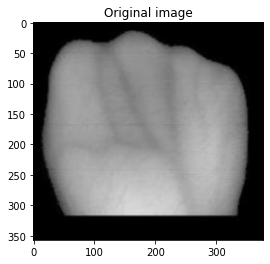

C:\Users\Marioom\AppData\Local\Temp\ipykernel_5696\214790894.py:40: RuntimeWarning: overflow encountered in ulong_scalars
  sum_ =int( int_img[y1, x1]-int_img[y0, x1]-int_img[y1, x0]+int_img[y0, x0])


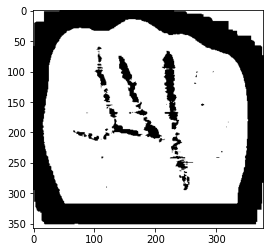

In [45]:
#Local thresholding 

# 1.Bradly local thrsholding
# Note : This implementation is extra as it shows the difference between global and local as lecture slides' image but we it is not our own implementation , We consider that the ostu local thresholding implementation in the next cell is our task seventh requirement.
img = np.array(Image.open('hand.jpeg')).astype(np.uint8)

# Apply gray scale
gray_img = np.round(0.299 * img[:, :, 0] +
                    0.587 * img[:, :, 1] +
                   0.114 * img[:, :, 2]).astype(np.uint8) 

def Bradly_local_thresholding(image):


    h, w = image.shape

    S = int(w//8)
    s2 = int(S//2)
    T = 4

    #int image
    int_img = np.zeros_like(image, dtype=np.uint32)
    for col in range(w):
        for row in range(h):
            int_img[row,col] = image[0:row,0:col].sum()

    
    Bradly_img = np.zeros_like(image)    

    for col in range(w):
        for row in range(h):
            
            y0 = max(row-s2, 0)
            y1 = min(row+s2, h-1)
            x0 = max(col-s2, 0)
            x1 = min(col+s2, w-1)

            count = (y1-y0)*(x1-x0)

            sum_ =int( int_img[y1, x1]-int_img[y0, x1]-int_img[y1, x0]+int_img[y0, x0])

            if image[row, col]*count < sum_*(100.-T)/100.:
                Bradly_img[row,col] = 0
            else:
                Bradly_img[row,col] = 255
    return Bradly_img

plt.title('Original image')
plt.imshow(img) 
plt.show() 
BradlyThreshold_img=Bradly_local_thresholding(gray_img)
plt.imshow(BradlyThreshold_img)
plt.set_cmap('gray') 
plt.show() 
plt.imsave('Bradly_local_threshold.png', BradlyThreshold_img, cmap='gray', format='png')




In [46]:
# 8. RGB Histo & Distirbution , Convert to GreyScale

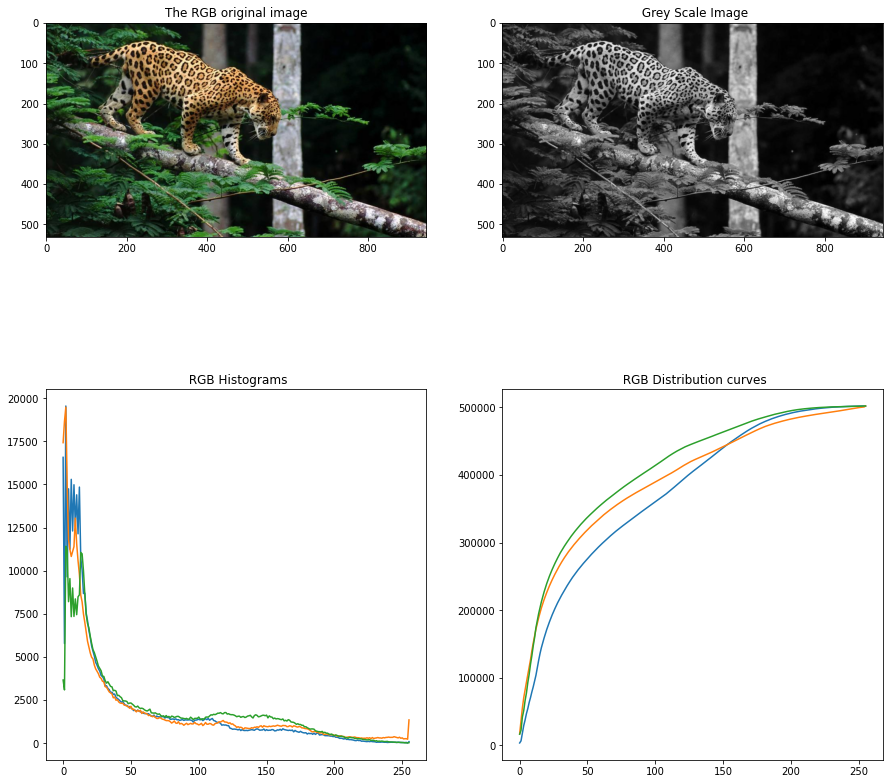

In [47]:
from cProfile import label
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Read Images
img = mpimg.imread('jaguar.jpg')
img = np.asarray(img)
pixles = np.linspace(0, 255, 256)
# get R,G,B channels
R, G, B = img[:, :, 0], img[:, :, 1], img[:, :, 2]


def RGBHistogram(r, g, b):
    Rflat = r.flatten()
    Gflat = g.flatten()
    Bflat = b.flatten()
    Rhisto = get_histogram(Rflat, 256)
    Ghisto = get_histogram(Gflat, 256)
    Bhisto = get_histogram(Bflat, 256)
    return Rhisto, Ghisto, Bhisto

# convert RGB to GreyScale


def RGBtoGrey(rgbimg):
    R, G, B = rgbimg[:, :, 0], rgbimg[:, :, 1], rgbimg[:, :, 2]
    imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
    return imgGray


imgGray = RGBtoGrey(img)
# get R G B histograms
Rhisto, Ghisto, Bhisto = RGBHistogram(R, G, B)
# get R g B Distribution curves
Rcs = acumulativeSum(Rhisto)
Gcs = acumulativeSum(Ghisto)
Bcs = acumulativeSum(Bhisto)
# # set up side-by-side image display img gray and histo and Cum Sum


fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
fig.add_subplot(2, 2, 1)
plt.title('The RGB original image')
plt.imshow(img)
fig.add_subplot(2, 2, 2)
plt.title(' Grey Scale Image')
plt.imshow(imgGray, cmap='gray')
plt.savefig('grey.png')
fig.add_subplot(2, 2, 3)
plt.title(' RGB Histograms')
plt.plot(pixles, Bhisto)
plt.plot(pixles, Rhisto)
plt.plot(pixles, Ghisto)

# display the new image
fig.add_subplot(2, 2, 4)
plt.title(' RGB Distribution curves')
plt.plot(Gcs, label="Green")
plt.plot(Rcs, label="Red")
plt.plot(Bcs, label='Blue')

In [48]:
# 9. Frequency domain Filters(Low-pass and High-pass filters)

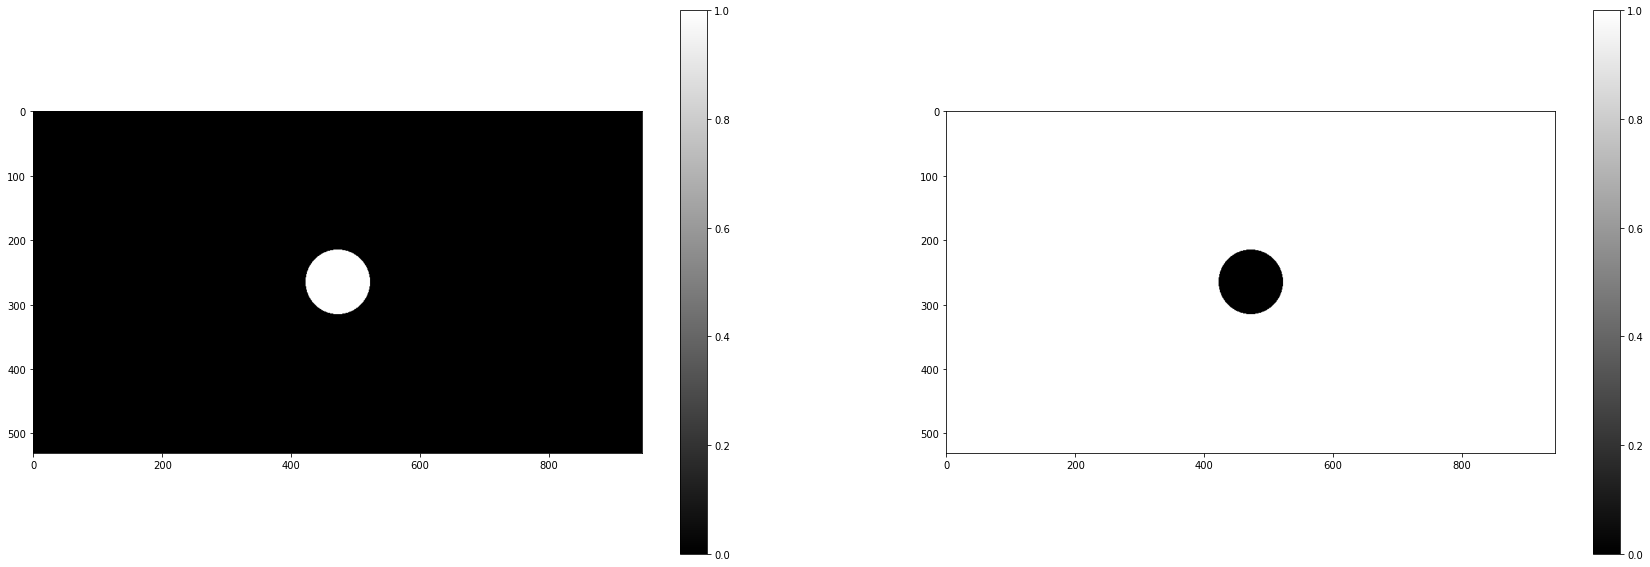

In [57]:
img = plt.imread('jaguar.jpg')

def draw_cicle(shape,diamiter):
    '''
    Input:
    shape    : tuple (height, width)
    diameter : scalar
    
    Output:
    np.array of shape  that says True within a circle with diamiter =  around center 
    '''
    assert len(shape) == 2
    TF = np.zeros(shape,dtype=bool)
    center = np.array(TF.shape)/2.0

    for iy in range(shape[0]):
        for ix in range(shape[1]):
            TF[iy,ix] = (iy- center[0])**2 + (ix - center[1])**2 < diamiter **2
    return(TF)

TFcircleIN   = draw_cicle(shape=img.shape[:2],diamiter=50)
TFcircleOUT  = ~TFcircleIN
#Low pass and High pass filters
fig = plt.figure(figsize=(30,10))
ax  = fig.add_subplot(1,2,1)
im  = ax.imshow(TFcircleIN,cmap="gray")
plt.colorbar(im)
ax  = fig.add_subplot(1,2,2)
im  = ax.imshow(TFcircleOUT,cmap="gray")
plt.colorbar(im)
plt.show()

C:\Users\Marioom\AppData\Local\Temp\ipykernel_5696\4116431028.py:46: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20*np.log(absfft)


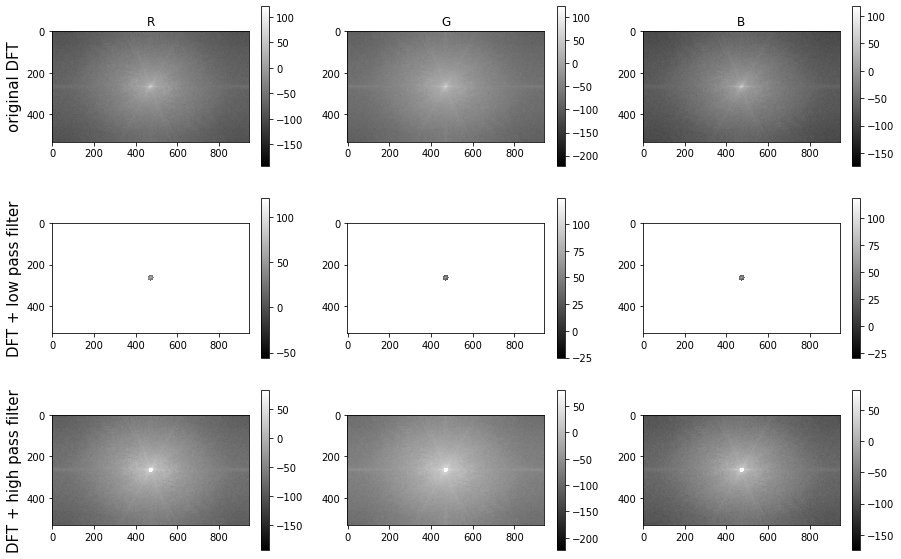

In [61]:
def Image_transform(Image):
    Image=Image/float(2**8)
    fft_img = np.zeros_like(Image,dtype=complex)
    for ichannel in range(fft_img.shape[2]):
        fft_img[:,:,ichannel] = np.fft.fftshift(np.fft.fft2(Image[:,:,ichannel]))
    return fft_img

def filter_circle(filter_type,Shape,fft_img_channel):
    temp = np.zeros(fft_img_channel.shape[:2],dtype=complex)
    if filter_type=="low":
        TFcircle=draw_cicle(shape=Shape,diamiter=20)
    else:
        TFcircle=~draw_cicle(shape=Shape,diamiter=5)
    temp[TFcircle] = fft_img_channel[TFcircle]
    return(temp)

def low_pass_filter(image):
    fft_image = Image_transform(image)
    fft_image_filtered_IN = []
    for ichannel in range(fft_image.shape[2]):
        fft_image_channel  = fft_image[:,:,ichannel]
        ## circle IN
        temp = filter_circle("low",image.shape[:2],fft_image_channel)
        fft_image_filtered_IN.append(temp)
    fft_image_filtered_IN = np.array(fft_image_filtered_IN)
    fft_image_filtered_IN = np.transpose(fft_image_filtered_IN,(1,2,0))
    return fft_image_filtered_IN

def High_pass_filter(image):
    fft_image = Image_transform(image)
    fft_image_filtered_OUT = []
    for ichannel in range(fft_image.shape[2]):
        fft_image_channel  = fft_image[:,:,ichannel]
        ## circle OUT
        temp = filter_circle("high",image.shape[:2],fft_image_channel)
        fft_image_filtered_OUT.append(temp) 
    fft_image_filtered_OUT = np.array(fft_image_filtered_OUT)
    fft_image_filtered_OUT = np.transpose(fft_image_filtered_OUT,(1,2,0))
    return fft_image_filtered_OUT

abs_fft_img              = np.abs(Image_transform(img))
abs_fft_img_filtered_IN  = np.abs(low_pass_filter(img))
abs_fft_img_filtered_OUT = np.abs(High_pass_filter(img))

def imshow_fft(absfft):
    magnitude_spectrum = 20*np.log(absfft)
    return(ax.imshow(magnitude_spectrum,cmap="gray"))

fig, axs = plt.subplots(nrows=3,ncols=3,figsize=(15,10))
fontsize = 15 

for ichannel, color in enumerate(["R","G","B"]):
    ax = axs[0,ichannel]
    ax.set_title(color)
    im = imshow_fft(abs_fft_img[:,:,ichannel])
    if ichannel == 0:
        ax.set_ylabel("original DFT",fontsize=fontsize)
    fig.colorbar(im,ax=ax)
    
    
    ax = axs[1,ichannel]
    im = imshow_fft(abs_fft_img_filtered_IN[:,:,ichannel])
    if ichannel == 0:
        ax.set_ylabel("DFT + low pass filter",fontsize=fontsize)
    fig.colorbar(im,ax=ax)
    
    ax = axs[2,ichannel]
    im = imshow_fft(abs_fft_img_filtered_OUT[:,:,ichannel])
    if ichannel == 0:
        ax.set_ylabel("DFT + high pass filter",fontsize=fontsize)   
    fig.colorbar(im,ax=ax)
    
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


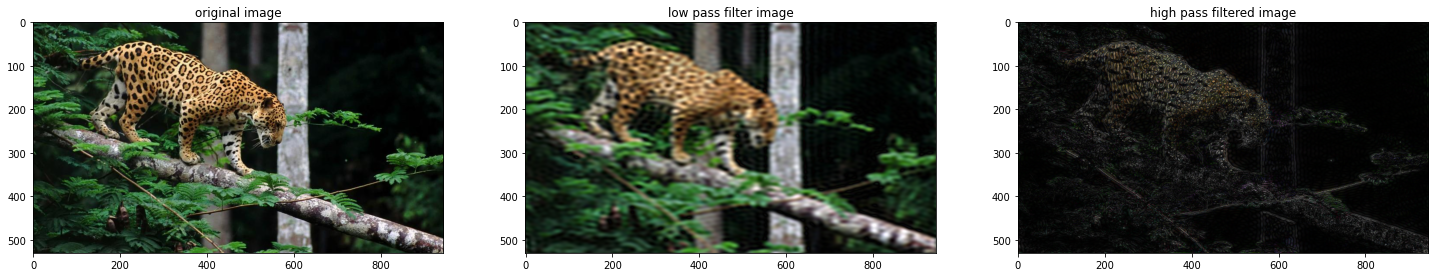

In [59]:
def inv_FFT_all_channel(fft_img):
    img_reco = []
    for ichannel in range(fft_img.shape[2]):
        img_reco.append(np.fft.ifft2(np.fft.ifftshift(fft_img[:,:,ichannel])))
    img_reco = np.array(img_reco)
    img_reco = np.transpose(img_reco,(1,2,0))
    return(img_reco)


img_reco              = inv_FFT_all_channel(Image_transform(img))
img_reco_filtered_IN  = inv_FFT_all_channel(low_pass_filter(img))
img_reco_filtered_OUT = inv_FFT_all_channel(High_pass_filter(img))

fig = plt.figure(figsize=(25,18))
ax  = fig.add_subplot(1,3,1)
ax.imshow(np.abs(img_reco))
ax.set_title("original image")

ax  = fig.add_subplot(1,3,2)
ax.imshow(np.abs(img_reco_filtered_IN))
ax.set_title("low pass filter image")


ax  = fig.add_subplot(1,3,3)
ax.imshow(np.abs(img_reco_filtered_OUT))
ax.set_title("high pass filtered image")
plt.show()

In [ ]:
# 10. Hybrid image 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


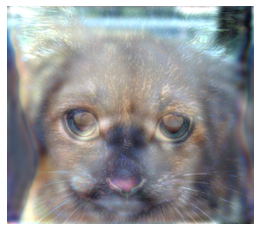

In [62]:
def Hybrid(img1,img2,padding_type):
    """
    Parameters:
        img1: first image
        img2:secong image
        padding_type : "constant" , "edge" , "linear_ramp" , "maximum" ..etc   ->see np.pad() documentation for all padding modes

        This function takes two images ,filters one by LPF and the other by HPF then adds them pixel-wise 
        Note:
            Padding is applied if the 2 images have different sizes to make them of equal dimensions
    """
    size1=img1.shape
    size2=img2.shape
    try:
        return(np.abs(inv_FFT_all_channel(High_pass_filter(img1))) + np.abs(inv_FFT_all_channel(low_pass_filter(img2))))
    except:
        height_diff=int(np.ceil(np.abs(size1[0]-size2[0])/2))
        width_diff=int(np.ceil(np.abs(size1[1]-size2[1])/2))
        if (size1[0]-size2[0]>0):
            if (size1[1]-size2[1]>0):
                img2=np.pad(img2,((height_diff,np.abs(size1[0]-size2[0])-height_diff),(width_diff,np.abs(size1[1]-size2[1])-width_diff),(0,0)),padding_type)  #((top, bottom), (left, right))
            else:
                img2=np.pad(img2,((height_diff,np.abs(size1[0]-size2[0])-height_diff),(0,0),(0,0)),padding_type)
                img1=np.pad(img1,((0,0),(width_diff,np.abs(size1[1]-size2[1])-width_diff),(0,0)),padding_type) 

        else:
            if (size1[1]-size2[1]<0):
                img1=np.pad(img1,((height_diff,np.abs(size1[0]-size2[0])-height_diff),(width_diff,np.abs(size1[1]-size2[1])-width_diff),(0,0)),padding_type)  #((top, bottom), (left, right))
            else:
                img2=np.pad(img2,((0,0),(width_diff,np.abs(size1[1]-size2[1])-width_diff),(0,0)),padding_type) 
                img1=np.pad(img1,((height_diff,np.abs(size1[0]-size2[0])-height_diff),(0,0),(0,0)),padding_type)
        return(np.abs(inv_FFT_all_channel(High_pass_filter(img1))) + np.abs(inv_FFT_all_channel(low_pass_filter(img2))))


img1 = plt.imread('cat.jpg')
img2 = plt.imread('dog.jpg')
Hybrid_img = Hybrid(img1,img2,padding_type="edge") 
plt.imshow(Hybrid_img)
plt.axis("off")
plt.show()